# Project 2 - Wrangle and Analyze data

### Table Of Contents

- Introduction
- Gathering Data
- Assessing Data
- Cleaning Data
- Storing Data
- Analyzing and Visualizing data
- Reporting

## Introduction

WeRateDogs is a Twitter account that rates several people's dogs with humourous comment(s) about their dog. I want to create interesting and trustworthy analyses and visualizations. The Twitter archive provided only contains very basic tweet information. Additional gathering, then assessing and cleaning will be done for a worthy analyses and visualizations.

### Data Gathering

I need three pieces of data which I will gather by:

1. Downloading the provided file, 'twitter_archive_enhanced.csv' manually. Once it is downloaded, I will upload it and read the data into a pandas DataFrame.

2. Download programmatically the 'image-predictions.tsv' using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Gather each tweet's retweet count and favorite ("like") count using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.
Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame, tweet ID, retweet count, and favorite count.

**Note:** - There is no need to gather the tweets beyond August 1st, 2017 because you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [1]:
# import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import lxml
%matplotlib inline
import os
import io
import tweepy
from tweepy import OAuthHandler
from twython import Twython
import json
from timeit import default_timer as timer
import re

ModuleNotFoundError: No module named 'tweepy'

#### Importing the first dataset we will work with and reading it through a csv file stored in a variable name df1

In [178]:
#importing the first dataset we will work and reading it through a csv file stored in a variable name df1

df1 = pd.read_csv('twitter-archive-enhanced.csv')

#### Importing the second dataset we will work with using the requests.get() function and reading it through a csv file stored in a variable name df2

In [179]:
# download the image predictions data from URL using the requests package

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
r = response.content
df2 = pd.read_csv(io.StringIO(r.decode('utf-8')), sep='\t')

#### Importing the third dataset we will work with using tweepy library and reading it through a csv file stored in a variable name df3

In [6]:
#import twitter API tweepy and the keys to access the API

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df1.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet-json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [180]:
# reading api generated text file into data_frame

tweet_json_txt = pd.read_table('tweet-json.txt')

In [181]:
# Extracting and reading tweet_id, favorite_counts and Retweet_counts from Text file into DataFrame

def text():
    with open("tweet-json.txt","r",encoding="utf-8") as file: # opening and reading text file
        created=file.read()[:-1]
    df2list=[]
    retweet=re.findall(("(\W.id.{25}\d).*(retweet_count.{8})"),created)   # Extracting retweet_count and favorite_count using regular expression
    fave=re.findall(("(\W.id.{25}\d).*(favorite_count.{8})"),created)
    fave_df=pd.DataFrame(fave)   # Reading favorite_count into dataframe
    fave_df["tweet_id"]=fave_df[0].str.extract("(\d.*)")
    fave_df["favorite_count"]=fave_df[1].str.extract("(\d.*)")
    fave_df["favorite_count"]=fave_df["favorite_count"].str.split(",",expand=True)[0]
    fave_df=fave_df.drop([0,1],axis=1)
    retweet_df=pd.DataFrame(retweet) # reading retweet_count into dataframe
    retweet_df["tweet_id"]=retweet_df[0].str.extract("(\d.*)")
    retweet_df["retweet_count"]=retweet_df[1].str.extract("(\d.*)")
    retweet_df["retweet_count"]=retweet_df["retweet_count"].str.split(",",expand=True)[0]
    retweet_df=retweet_df.drop([0,1],axis=1)
    return fave_df.merge(retweet_df) # Merging favorite_count and retweet_count
df3 = text()

### Assessing Data

- Here, I would assess each of the data gathered visually and programmatically for quality and tidiness issues, detect and document at 8 quality issues and 2 tidiness issues
- I want only original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

#### Assess the **first** data visually

In [10]:
# view the first 5 rows of the data

df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
# view the last 5 rows of the data

df1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [193]:
# view random rows of the data

df1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
729,781955203444699136,NaN,NaN,2016-09-30 20:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chipson. He weighed in at .3 ounces an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781955203...,11,10,Chipson,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
588,799422933579902976,NaN,NaN,2016-11-18 01:24:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Longfellow (prolly sophisticated). He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799422933...,12,10,Longfellow,None,None,None,None
607,798209839306514432,NaN,NaN,2016-11-14 17:03:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. His bow tie was too heavy for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798209839...,13,10,Cooper,None,None,None,None
1055,742385895052087300,NaN,NaN,2016-06-13 15:59:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phil. That's his comfort stick. He hol...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742385895...,11,10,Phil,None,None,None,None
1565,688064179421470721,NaN,NaN,2016-01-15 18:24:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He's a Pouncing Brioche. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688064179...,11,10,Kilo,None,None,None,None
1250,711008018775851008,NaN,NaN,2016-03-19 01:54:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuckles. He had a balloon but he acci...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711008018...,11,10,Chuckles,None,None,pupper,None
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None
1472,693942351086120961,NaN,NaN,2016-01-31 23:42:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kobe. He's a Speckled Rorschach. Reque...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693942351...,10,10,Kobe,None,None,None,None
2180,669000397445533696,NaN,NaN,2015-11-24 03:51:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Terrance. He's being yelled at because he...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None


#### Assess the **second** data visually

In [13]:
# view the first 5 rows of the data

df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
# view the last 5 rows of the data

df2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [15]:
# view random rows of the data

df2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1876,845812042753855489,https://pbs.twimg.com/media/C7ztkInW0AEh1CD.jpg,1,Samoyed,0.979803,True,chow,0.015923,True,white_wolf,0.001303,False
128,668274247790391296,https://pbs.twimg.com/media/CUYv4d2WUAAziXs.jpg,1,soft-coated_wheaten_terrier,0.406374,True,Lakeland_terrier,0.263854,True,toy_poodle,0.150844,True
1381,765371061932261376,https://pbs.twimg.com/media/Cp8k6oRWcAUL78U.jpg,2,golden_retriever,0.829456,True,Labrador_retriever,0.089371,True,kuvasz,0.017028,True
1184,738883359779196928,https://pbs.twimg.com/media/CkEKe3QWYAAwoDy.jpg,2,Labrador_retriever,0.691137,True,golden_retriever,0.195558,True,Chesapeake_Bay_retriever,0.019585,True
1285,750719632563142656,https://pbs.twimg.com/media/CmsXg9AWgAAs6Ui.jpg,1,Pembroke,0.972587,True,Cardigan,0.014772,True,basenji,0.005798,True
1700,817056546584727552,https://pbs.twimg.com/media/C1bEl4zVIAASj7_.jpg,1,kelpie,0.864415,True,French_bulldog,0.097456,True,German_shepherd,0.008526,True
860,696900204696625153,https://pbs.twimg.com/media/CavjCdJW0AIB5Oz.jpg,1,Chihuahua,0.297735,True,Pembroke,0.266953,True,basenji,0.136814,True
1617,802323869084381190,https://pbs.twimg.com/media/CyJtSmDUAAA2F9x.jpg,4,home_theater,0.765069,False,television,0.203578,False,entertainment_center,0.018644,False
391,673576835670777856,https://pbs.twimg.com/media/CVkGjsxU8AA5OYX.jpg,1,teddy,0.255210,False,Christmas_stocking,0.098285,False,pajama,0.072735,False
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True


#### Assess the **third** data visually

In [16]:
# view the first 5 rows of the data

df3.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [17]:
# view the last 5 rows of the data

df3.tail()

,tweet_id,favorite_count,retweet_count
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [18]:
# view random rows of the data

df3.sample(10)

,tweet_id,favorite_count,retweet_count
1721,680100725817409536,3891,1554
1960,673355879178194945,1606,652
1475,693622659251335168,1691,422
2170,669327207240699904,610,127
714,783839966405230592,33689,12643
1929,674036086168010753,906,240
536,806629075125202948,75639,37911
931,753655901052166144,6458,2492
776,776088319444877312,2045,179
2216,668507509523615744,345,116


#### Assess the first data programmatically

In [19]:
# more information about the data such as missing data, datatype

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
# missing data 

df1.duplicated().sum()

0

In [183]:
# view to see if there is any missing value

df1.isna()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [173]:
# view sum of all missing values

df1.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [182]:
# view column names

df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [22]:
# data description showing the measures of central tendency

df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
# value count of the rating denominator

df1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [24]:
# value count of the rating numerator

df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [25]:
df1[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [26]:
# display tweets with rating_denominator above and below 10 and rating_numerator less than 20 and are NOT replies and are NOT retweets

df_limit_10 = (df1["rating_denominator"] != 10) & (df1["rating_numerator"] <= 20) & df1['in_reply_to_status_id'].isna() & df1['retweeted_status_id'].isna() 
df_limit_10

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

In [27]:
df1[df_limit_10][['tweet_id','rating_denominator','rating_numerator','text']]

,tweet_id,rating_denominator,rating_numerator,text
1068,740373189193256964,11,9,"After so many requests, this is Bretagne. She ..."
1165,722974582966214656,20,4,Happy 4/20 from the squad! 13/10 for all https...
1662,682962037429899265,11,7,This is Darrel. He just robbed a 7/11 and is i...
2335,666287406224695296,2,1,This is an Albanian 3 1/2 legged Episcopalian...


In [28]:
sum(df_limit_10)

4

#### Assessing Image_predictions Data programmatically - second data

In [29]:
# view the Index,datatype, missing values of Images-predictions datasets

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [185]:
# view to see if there is any missing value

df2.isna()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,False,False,False,False,False,False,False,False,False,False,False,False
2071,False,False,False,False,False,False,False,False,False,False,False,False
2072,False,False,False,False,False,False,False,False,False,False,False,False
2073,False,False,False,False,False,False,False,False,False,False,False,False


In [186]:
# view sum of all missing values

df2.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [187]:
# view column names

df2.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [30]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [31]:
sum(df2.duplicated())

0

In [32]:
df2['p1'].value_counts().sample(10)

flat-coated_retriever    8
home_theater             6
dishwasher               3
padlock                  1
canoe                    1
tennis_ball              9
clog                     1
minibus                  1
Scotch_terrier           1
cheeseburger             1
Name: p1, dtype: int64

In [33]:
df2['p2'].value_counts().sample(10)

Bedlington_terrier     5
printer                1
Arabian_camel          4
bull_mastiff          14
drake                  1
Irish_terrier         17
racket                 1
tailed_frog            2
chain_saw              2
soccer_ball            1
Name: p2, dtype: int64

In [34]:
df2['p3'].value_counts().sample(10)

guillotine           1
titi                 2
king_penguin         2
Afghan_hound         4
barbell              1
bulletproof_vest     1
malinois             4
schipperke           6
beagle              31
park_bench           1
Name: p3, dtype: int64

#### Assess the third data set programmatically

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   favorite_count  2354 non-null   object
 2   retweet_count   2354 non-null   object
dtypes: object(3)
memory usage: 73.6+ KB


In [188]:
# view to see if there is any missing value

df3.isna()

,tweet_id,favorite_count,retweet_count
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2349,False,False,False
2350,False,False,False
2351,False,False,False
2352,False,False,False


In [189]:
# view sum of all missing values

df3.isna().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [190]:
# view column names

df3.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

In [36]:
df3.describe()

,tweet_id,favorite_count,retweet_count
count,2354,2354,2354
unique,2354,2007,1724
top,892420643555336193,0,1972
freq,1,179,5


In [37]:
#checking for null values
df3.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

### Quality Issues

- Twitter-archive

1.  Retweets available in the datframe instead of just the original tweets
2.  Drop retweet related columns
3.  Erroneous datatype of timestamp
4.  Erroneous datatype of tweet_id
5.  The source column can be cleaner by extracting and replacing with it's main string. There are only 4 types of values in the source column (Twitter for iPhone, Vine - Make a Scene, Twitter Web Client, TweetDeck)

- Image_predictions

6.  Non Descriptive column names (p1,p2,p3,p1_conf)
7.  Inconsistent values case
8.  There should be column for image prediction and another column for confidence level

### Tidiness Issues

- Twitter-archive

1. The dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo,     floofer, pupper, puppo.

2. Merge the three data frames as one

## Cleaning Data

In [38]:
# make copies of the original three pieces of data and save into new variables

df1_copy = df1.copy()
df2_copy = df2.copy()
df3_copy = df3.copy()
df1_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Quality Issues

### Issue #1

We are only interested in the original tweets , we remove rows with retweets

#### Define

Drop all rows and columns containing retweets, where these columns will be non-null: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

#### Code

In [40]:
#dropping the rows
df1_copy = df1_copy[df1_copy.retweeted_status_id.isnull()]
df1_copy = df1_copy[df1_copy.in_reply_to_status_id.isnull()]


#### Test

In [41]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2

Drop retweet related columns

#### Define

Delete tweet related columns such as 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id' and 'in_reply_to_user_id'

#### Code

In [42]:
# drop columns not needed for the analysis

df1_copy = df1_copy.drop(['retweeted_status_id',
                        'retweeted_status_user_id',
                        'retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis = 1)

#### Test

In [43]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #3

Erroneous datatypes

#### Define

Convert the timestamp datatype to the datetime

#### Code

In [44]:
# convert the timestamp 

df1_copy['timestamp'] = pd.to_datetime(df1_copy['timestamp'])

In [45]:
#extract month and day to new columns and year

df1_copy['year'] = df1_copy['timestamp'].dt.year
df1_copy['month'] = df1_copy['timestamp'].dt.month
df1_copy['day'] = df1_copy['timestamp'].dt.day

#### Test

In [46]:
# confirm the columns in the df1 table 

df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
 12  year                2097 non-null 

### Issue #4

Datatype of tweet_id

#### Define

Convert the datatype of tweet_id to int

#### Code

In [56]:
df3_copy['tweet_id'] = df3_copy['tweet_id'].astype('int64')

#### Test

In [58]:
df3_copy['tweet_id'].dtypes

dtype('int64')

### Issue #5

The source column in the twitter archive data can be cleaner by extracting and replacing with it's main string

#### Define

Using regular expression, regex, replace the source string with the main string.

#### Code

In [202]:
df1_copy.source.value_counts

<bound method IndexOpsMixin.value_counts of 0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2097, dtype: object>

In [ ]:
df1_copy.source = df1_copy.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

#### Test

In [203]:
df1_copy.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [209]:
df1_copy.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03+00:00,Twitter for iPhone,You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None,2017,7,18
1392,700062718104104960,NaN,NaN,2016-02-17 21:02:13+00:00,Twitter for iPhone,This is Eazy-E. He's colorful af. Must be rare...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700062718...,6,10,Eazy,None,None,None,None,2016,2,17
616,796484825502875648,NaN,NaN,2016-11-09 22:49:15+00:00,Twitter for iPhone,Here's a sleepy doggo that requested some assi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825...,12,10,None,doggo,None,None,None,2016,11,9
2014,672222792075620352,NaN,NaN,2015-12-03 01:16:17+00:00,Twitter for iPhone,This is Cal. He's a Swedish Geriatric Cheddar....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672222792...,9,10,Cal,None,None,None,None,2015,12,3
1711,680497766108381184,NaN,NaN,2015-12-25 21:18:05+00:00,Twitter for iPhone,Meet Percy. He's a Latvian Yuletide Heineken. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680497766...,12,10,Percy,None,None,None,None,2015,12,25
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None,2015,11,15
1546,689283819090870273,NaN,NaN,2016-01-19 03:10:43+00:00,Twitter for iPhone,Say hello to Chipson. He's aerodynamic af. No ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689283819...,9,10,Chipson,None,None,None,None,2016,1,19
1549,689255633275777024,NaN,NaN,2016-01-19 01:18:43+00:00,Vine - Make a Scene,This is Ferg. He swallowed a chainsaw. 1 like ...,NaN,NaN,NaN,https://vine.co/v/iOL792n5hz2,10,10,Ferg,None,None,None,None,2016,1,19
2236,668154635664932864,NaN,NaN,2015-11-21 19:50:53+00:00,Twitter for iPhone,Fun dogs here. Top one clearly an athlete. Bot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668154635...,9,10,None,None,None,None,None,2015,11,21
1348,704347321748819968,NaN,NaN,2016-02-29 16:47:42+00:00,Twitter for iPhone,This is Ralphson. He's very confused. Wonderin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704347321...,10,10,Ralphson,None,None,pupper,None,2016,2,29


### Issue #6

Non Descriptive column names

#### Define

Rename the columns with the following descriptive names- prediction1, confidence1, pred1_dog, prediction2, pred2_dog, prediction3, pred3_dog

#### Code

In [60]:
df2_copy=df2_copy.rename(columns={'p1': 'prediction1', 'p1_conf': 'confidence1', 'p1_dog': 'pred1_dog', 'p2':'prediction2', 
                                    'p2_conf': 'confidence2','p3_conf':'confidence3','p2_dog':'pred2_dog', 'p3':'prediction3', 'p3_dog':'pred3_dog'})

#### Test

In [61]:
df2_copy.head()

,tweet_id,jpg_url,img_num,prediction1,confidence1,pred1_dog,prediction2,confidence2,pred2_dog,prediction3,confidence3,pred3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #7

Inconsistent values case

#### Define

Change the values to lower cases strings

#### Code

In [62]:
df2_copy['prediction1'] = df2_copy.prediction1.str.lower()
df2_copy['prediction2'] = df2_copy.prediction2.str.lower()
df2_copy['prediction3'] = df2_copy.prediction3.str.lower()

#### Test

In [63]:
df2_copy['prediction1'].sample()

1792    kuvasz
Name: prediction1, dtype: object

### Issue #8

 There should be column for image prediction and another column for confidence level

#### Define

Create a function to store the first true prediction along the confidence level as new columns.

#### Code

In [65]:
#The first prediction (prediction1, prediction2 or prediction3) will be stored in these lists

predictions = []
confidence = []


def labels(df2_copy):
    if df2_copy['pred1_dog'] == True:
        predictions.append(df2_copy['prediction1'])
        confidence.append(df2_copy['confidence1'])
    elif df2_copy['pred2_dog'] == True:
        predictions.append(df2_copy['prediction2'])
        confidence.append(df2_copy['confidence2'])
    elif df2_copy['pred3_dog'] == True:
        predictions.append(df2_copy['prediction3'])
        confidence.append(df2_copy['confidence3'])
    else:
        predictions.append('Error')
        confidence.append('Error')


df2_copy.apply(labels, axis=1)

# new columns

df2_copy['predictions'] = predictions
df2_copy['confidence'] = confidence

In [68]:
# drop rows with errors

df2_copy = df2_copy[df2_copy['predictions'] != 'Error']

#### Test

In [69]:
df2_copy.head()

,tweet_id,jpg_url,img_num,prediction1,confidence1,pred1_dog,prediction2,confidence2,pred2_dog,prediction3,confidence3,pred3_dog,predictions,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,miniature_pinscher,0.560311


### Tidiness Issues

### Issue #1

The dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo.

#### Define

Create a new column dog_stage to merge floofer,pupper,dogoo and puppo.

#### Code

In [70]:
# creating a new column dog_stage to merge floofer,pupper,dogoo and puppo and cleaning conflict in dog_stages 
# Addressing the quality issue of doggo and other stages conflict

dog_data = df1_copy[["doggo","floofer","puppo","pupper"]]
stage = []
def melter():
    for index,i in dog_data.iterrows():
        if list(i.unique())==["None","puppo"]:
            stage.append("puppo")
        if list(i.unique())==["None","pupper"]:
            stage.append("pupper")
        if list(i.unique())==["doggo","None"]:
            stage.append("doggo")
        if list(i.unique())==["None","floofer"]:
            stage.append("floofer")
        if list(i.unique())==["doggo","None","puppo"]:
            stage.append("doggo")
        if list(i.unique())==["doggo","None","pupper"]:
            stage.append("doggo")
        if list(i.unique())==["doggo","floofer","None"]:
            stage.append("floofer")
        if list(i.unique())==["None"]:
            stage.append("None")        
        
melter()
df = pd.DataFrame(stage)
df["dog_stage"] = df[0]
dog_data_1 = dog_data.merge(df,left_index=True,right_index=True)
dog_data_2 = dog_data_1.drop(0,axis=1)
df = df1_copy.merge(dog_data_2)
df = df.drop(dog_data.columns,axis=1)
df = df.drop_duplicates().reset_index(drop=True)

#### Test

In [71]:
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017,8,1,None
1,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017,8,1,pupper
2,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017,8,1,doggo
3,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017,8,1,floofer
4,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017,8,1,puppo
...,...,...,...,...,...,...,...,...,...,...,...,...
9818,741067306818797568,2016-06-10 00:39:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,2016,6,10,doggo
9819,741067306818797568,2016-06-10 00:39:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,2016,6,10,None
9820,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,2016,5,19,pupper
9821,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,2016,5,19,doggo


In [72]:
df['dog_stage'].replace('None', np.NAN, inplace=True)

In [73]:
df['dog_stage'].unique()

array([nan, 'pupper', 'doggo', 'floofer', 'puppo'], dtype=object)

In [74]:
df['dog_stage'].value_counts()

pupper     2096
doggo      2086
puppo      1784
floofer    1761
Name: dog_stage, dtype: int64

In [75]:
df['dog_stage'].describe()

count       7727
unique         4
top       pupper
freq        2096
Name: dog_stage, dtype: object

### Issue #2

The three data frames should be merged as one

#### Define

Merge all three data frames

#### Code

In [76]:
# Merging all three DataFrames

def new():
    df_1 = df.merge(df2_copy)
    df_3_= df3.astype("int64")
    df_1 = df_1.merge(df_3_)
    return df_1
df = new()

#### Test

In [77]:
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,...,prediction2,confidence2,pred2_dog,prediction3,confidence3,pred3_dog,predictions,confidence,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017,8,...,pekinese,0.090647,True,papillon,0.068957,True,chihuahua,0.323581,33819,6514
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017,8,...,pekinese,0.090647,True,papillon,0.068957,True,chihuahua,0.323581,33819,6514
2,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017,8,...,pekinese,0.090647,True,papillon,0.068957,True,chihuahua,0.323581,33819,6514
3,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017,8,...,pekinese,0.090647,True,papillon,0.068957,True,chihuahua,0.323581,33819,6514
4,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017,8,...,pekinese,0.090647,True,papillon,0.068957,True,chihuahua,0.323581,33819,6514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7821,741067306818797568,2016-06-10 00:39:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,2016,6,...,labrador_retriever,0.052956,True,kelpie,0.035711,True,golden_retriever,0.843799,10342,3520
7822,741067306818797568,2016-06-10 00:39:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,2016,6,...,labrador_retriever,0.052956,True,kelpie,0.035711,True,golden_retriever,0.843799,10342,3520
7823,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,2016,5,...,labrador_retriever,0.042319,True,doormat,0.003956,False,golden_retriever,0.945523,44619,17621
7824,733109485275860992,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,2016,5,...,labrador_retriever,0.042319,True,doormat,0.003956,False,golden_retriever,0.945523,44619,17621


## Storing Data

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [325]:
df.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualization.

### Insights



1. Which dog stage has the highest favorite counts compared to other dogs stages

2. Is there a correlation between favorite count and retweet count?

3. What is the top 5 Favorite Dog breed

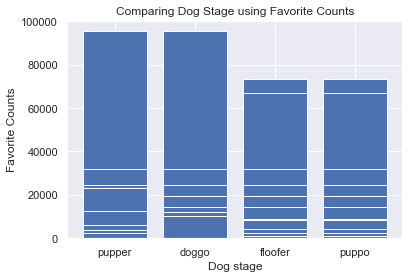

In [350]:
# visualization of the dog stage that has the highest favorite counts compared to other dogs stages using bar chart

df = df.replace("None",np.nan).dropna()
plt.bar(df.dog_stage,df.favorite_count)
plt.xlabel("Dog stage")
plt.ylabel("Favorite Counts")
plt.title("Comparing Dog Stage using Favorite Counts")
plt.show()

#### Insight 1 - From the bar chart above, both doggo and pupper dog stage have the highest favorite counts of about 98000

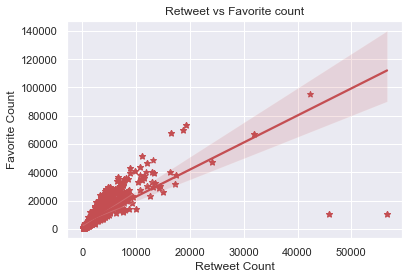

In [337]:
# visualization to ceck if there is correlation between favorite count and retweet count?

_= sns.regplot(x= df['retweet_count'],y = df['favorite_count'], marker = '*', color = 'r')
_ = plt.xlabel('Retweet Count')
_= plt.ylabel('Favorite Count')
_= plt.title('Retweet vs Favorite count')

#### Insight 2- From the chart above, we can see a positive correlation between Favorite count and Retweet count

In [347]:
common_dog_breed = df.predictions.value_counts().nlargest(5)

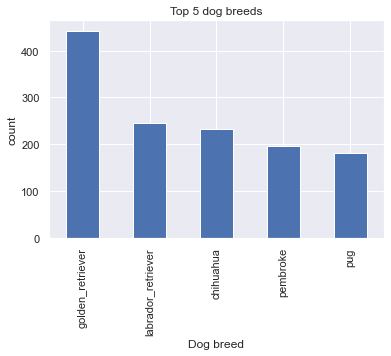

In [348]:
# visualization to see the top 5 Favorite Dog breed using bar chart

_ = common_dog_breed.plot(kind='bar', title='Top 5 dog breeds') 
_=plt.xlabel('Dog breed')
_= plt.ylabel('count')
_ = plt.title('Top 5 dog breeds')

#### Insight 3 - From the above bar chart, the top 5 favorite dog breeds are golden_retriver, labrador_retriever, chihuahua, pembroke and pug with golden_retriver of about 480 counts, followed by labrador_retriever at about 240, chihuahua at about 230, and the rest of the dog breeds are below 200 in counts